In [14]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount("/content/drive", force_remount=True)

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# Создание двуслойной нейронной сети
# для обучения с помощью набора MNIST.
# пример из книги "Создаем нейронную сеть"
# (c) Tariq Rashid, 2016

In [15]:
import numpy as np
# библиотека scipy.special содержит сигмоиду - expit ()
import scipy.special as ss
# библиотека для графического отображения массивов import 
import matplotlib.pyplot
# размещение графики в данном блокноте, а не в отдельном окне
%matplotlib inline

In [19]:
# определение класса нейронной сети 
class neuralNetwork:
    
    
    # инициализировать нейронную сеть
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # задать количество входных узлов и узлов в скрытом и выходном слоях 
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # Матрицы весовых коэффициентов связей 
        # wih (между входным и скрытым слоями)и
        # who (между скрытым и выходным слоями).
        # Весовые коэффициенты связей между узлом i и узлом j
        # следующего слоя обозначены как  w_i_j
        # w11 w21
        # w12 w22 и т.д. 
        self.wih = np.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # коэффициент скорости обучения
        self.lr = learningrate
        
        # использование сигмоиды в качестве функции активации 
        self.activation_function = lambda x: ss.special.expit(x)
        
        pass

    
    # тренировка нейронной сети
    def train(self, inputs_list, targets_list):
        # преобразование списка входных значений
        # в двухмерный массив
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        # рассчитать входящие сигналы для скрытого слоя 
        hidden_inputs = np.dot(self.wih, inputs)
        # рассчитать исходящие сигналы для скрытого слоя 
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # рассчитать входящие сигналы для выходного слоя 
        final_inputs = np.dot(self.who, hidden_outputs)
        # рассчитать исходящие сигналы для выходного слоя 
        final_outputs = self.activation_function(final_inputs)
        
        # ошибки выходного слоя (целевое значение - фактическое значение)
        output_errors = targets - final_outputs
        # ошибки скрытого слоя - это ошибки output_errors
        # распределенные пропорционально весовым коэффициентам связей
        # и рекомбинированные на скрытых узлах 
        hidden_errors = np.dot(self.who.T, output_errors) 
        
        # обновить весовые коэффициенты для связей между скрытым и выходным слоями 
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        
        # обновить весовые коэффициенты для связей между входным и скрытым слоями
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        
        return output_errors
        #pass

        

    
    # опрос нейронной сети
    def query(self, inputs_list):
        # преобразовать список входных значений в двухмерный массив
        inputs = np.array(inputs_list, ndmin=2).T
        
        # рассчитать входящие сигналы для скрытого слоя 
        hidden_inputs = np.dot(self.wih, inputs)
        # рассчитать исходящие сигналы для скрытого слоя 
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # рассчитать входящие сигналы для выходного слоя 
        final_inputs = np.dot(self.who, hidden_outputs)
        # рассчитать исходящие сигналы для выходного слоя 
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [ ]:
# количество входных, скрытых и выходных узлов 
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# коэффициент скорости обучения 
learning_rate = 0.1

# создать экземпляр нейронной сети
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [ ]:
# загрузить в список тренировочный набор данных CSV-файла набора MNIST
training_data_file = open('/content/drive/MyDrive/MNIST/mnist_train_068.csv', 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

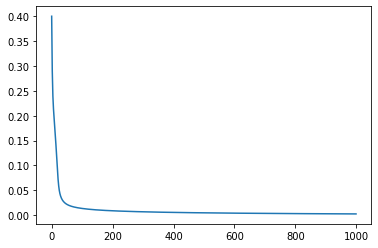

In [ ]:
# тренировка нейронной сети

# переменная epochs указывает, сколько раз тренировочный
# набор данных используется для тренировки сети 
epochs = 1000

error_epochs = [] # ошибки за эпоху


for e in range(epochs):
    # перебрать все записи в тренировочном наборе данных 
    sum_error = 0   # суммирование ошибок по всем записям 
    for record in training_data_list:
        # получить список значений из записи, используя символы
        # запятой ',' в качестве разделителей 
        all_values = record.split(',')
        # масштабировать и сместить входные значения
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # создать целевые выходные значения (все равны 0.01, 
        # за исключением желаемого маркерного значения, равного 0.99)
        targets = np.zeros(output_nodes) + 0.01
        # all_values[0] - целевое маркерное значение для данной записи 
        targets[int(all_values[0])] = 0.99
        
        # Измененить и добавить
        errors = n.train(inputs, targets) # ошибки вых. слоя на тек. эпохе
        e = np.linalg.norm(errors) # норма L2 вектора ошибок (СКО)
        sum_error = sum_error + e     # суммир. ошибок по всем записям 
        pass
    error_epochs.append(sum_error/60)  # массив СКО за каждую эпоху
    pass

    # рисуем график
matplotlib.pyplot.plot(error_epochs)
# показываем график 
matplotlib.pyplot.show()



In [ ]:
# загрузить в список тестовый набор данных из CSV-файла набора MNIST
test_data_file = open("/content/drive/MyDrive/MNIST/mnist_test_068.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [ ]:
# тестирование нейронной сети

# журнал оценок работы сети, первоначально пустой
scorecard = []

# перебрать все записи в тестовом наборе данных 
for record in test_data_list:
    # получить список значений из записи, используя символы
    # запятой ','в качестве разделителей 
    all_values = record.split(',')
    # правильный ответ - первое значение 
    correct_label = int(all_values[0])
    # масштабировать и сместить входные значения
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # опрос сети
    outputs = n.query(inputs)
    # индекс наибольшего значения является маркерным значением 
    label = np.argmax(outputs)
    # добавить оценку ответа сети в конец списка 
    if (label == correct_label):
        # в случае правильного ответа сети добавить к списку значение 1
        scorecard.append(1)
    else:
        # в случае неправильного ответа сети добавить к списку значение 0 
        scorecard.append(0)
        pass
    
    pass

In [ ]:
# рассчитать показатель эффективности в виде доли правильных ответов
scorecard_array = np.asarray(scorecard)
print(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

[1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
performance =  0.8


In [ ]:
# загрузить в список тестовый набор данных из CSV-файла набора MNIST
test_data_file = open("/content/drive/MyDrive/MNIST/mnist_test_068.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

0


array([[0.39973678],
       [0.0088238 ],
       [0.00851675],
       [0.00803588],
       [0.0088002 ],
       [0.00776394],
       [0.32278936],
       [0.00876358],
       [0.02043414],
       [0.00850093]])

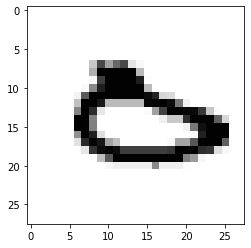

In [ ]:
# тестирование нейронной сети
# получить первую тестовую запись 
all_values = test_data_list[9].split(',')
# вывести маркер
print(all_values[1])
image_array=np.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
n.query((np.asfarray(all_values[1:])/255.0*0.99)+0.01)

In [ ]:
# тестирование нейронной сети

# журнал оценок работы сети, первоначально пустой
scorecard = []
# перебрать все записи в тестовом наборе данных
for record in test_data_list:
  # получить список значений из записи, используя символы
  # запятой (',') в качестве разделителей
  all_values = record.split(',')
  # правильный ответ - первое значение
  correct_label = int(all_values[0])
  print(correct_label, "истинный маркер")
  # масштабировать и сместить входные значения
  inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
  # опрос сети
  outputs = n.query(inputs)
  # индекс наибольшего значения является маркерным значением 
  label = np.argmax(outputs)
  print(label, "ответ сети")
  # присоединить оценку ответа сети к концу списка
  if (label == correct_label) :
    # в случае правильного ответа сети присоединить
    # к списку значение 1 
    scorecard.append(1)
  else:
    # в случае неправильного ответа сети присоединить
    # к списку значение 0 
    scorecard.append(0)
    pass
pass


0 истинный маркер
0 ответ сети
0 истинный маркер
6 ответ сети
0 истинный маркер
0 ответ сети
0 истинный маркер
6 ответ сети
0 истинный маркер
6 ответ сети
0 истинный маркер
0 ответ сети
0 истинный маркер
6 ответ сети
0 истинный маркер
0 ответ сети
0 истинный маркер
0 ответ сети
0 истинный маркер
0 ответ сети
6 истинный маркер
8 ответ сети
6 истинный маркер
6 ответ сети
6 истинный маркер
6 ответ сети
6 истинный маркер
6 ответ сети
6 истинный маркер
6 ответ сети
6 истинный маркер
6 ответ сети
6 истинный маркер
0 ответ сети
6 истинный маркер
6 ответ сети
6 истинный маркер
6 ответ сети
6 истинный маркер
6 ответ сети
8 истинный маркер
8 ответ сети
8 истинный маркер
8 ответ сети
8 истинный маркер
8 ответ сети
8 истинный маркер
8 ответ сети
8 истинный маркер
8 ответ сети
8 истинный маркер
8 ответ сети
8 истинный маркер
8 ответ сети
8 истинный маркер
8 ответ сети
8 истинный маркер
8 ответ сети
8 истинный маркер
8 ответ сети


In [ ]:
# рассчитать показатель эффективности в виде доли правильных ответов
scorecard_array = np.asarray(scorecard)
print(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

[1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
performance =  0.8


In [ ]:
test_data_list


['0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,253,192,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,73,99,252,253,180,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,140,181,253,179,98,252,253,252,92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,144,237,252,168,108,15,16,108,170,252,236,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,63,252,220,41,0,0,0,0,0,0,154,252,252,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,237,252,179,0,0,0,0,0,0,0,10,190,252,125,0,0,0,0,0,0,0,0,0,0,0,0,0,58,252,236,71,0,0,0,0,0,0,0,0,160,252,222,25,0,0,0,0,0,0,0,0,0,0,0,0,181,252,143,0,0,0,0,0,0,0,0,0,37,252,253,119,0,0,0,0,0,0,0,0,0,0,0,0,182,253,144,0,0,0,0,0,0,0,0,0,0,145,255,180,0,0,0,0,0,0,0,0,0,0,0,187,242,252,20,0,0,0,0,0,0,0,0,0,0,20,253,242,62,0,0,0,0,0,0,0,0,0,0,217,252,252,0,0,0,0,0,0,0,0,0,0,0,0,253,252,92,0,0,0,0,0,0,0,0,0,0,21